In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
nome_file='Friday-02-03-2018_TrafficForML_CICFlowMeter'

with open('pickle/'+nome_file+'/scaled_document.pickle', 'rb') as handle:

    df = pickle.load(handle)

In [3]:
feature_1 = 'Init Bwd Win Byts'
feature_2 = 'Fwd Pkts/s'


df = df[[feature_1, feature_2,'Label']]

In [4]:
df_prova = df.groupby(['Label'])['Label'].count()


df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

        Label
Label        
0      758334
1      286191


In [5]:
bot = df[df.Label == 1]
benign = df[df.Label == 0]

print("Benign: ", len(benign), "Bot: ", len(bot))

Benign:  758334 Bot:  286191


In [6]:
#bilanciamento del dataset
balanced_d = pd.concat([bot, benign.sample(len(bot))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(572382, 3)

In [7]:
# Eseguiamo il clustering

n_clusters = len(balanced_d['Label'].unique())  # numero di cluster

y_pred = KMeans(n_clusters=n_clusters).fit_predict(x)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = x[y_pred == i]
    cluster_classes = y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

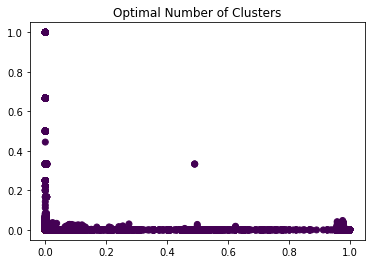

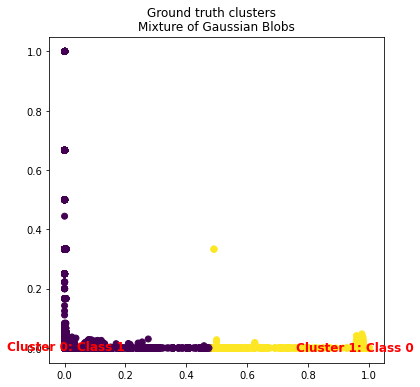

In [8]:
# Plot dei risultati
plt.scatter(x[feature_1], x[feature_2], c=balanced_d['Label'])
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(x[feature_1], x[feature_2], c=y_pred)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    axs.text(
        np.mean(x[feature_1][y_pred == i]), np.mean(x[feature_2][y_pred == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()